<a href="https://colab.research.google.com/github/sebagit914/Exam3_Auto_Insurance/blob/main/Auto_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

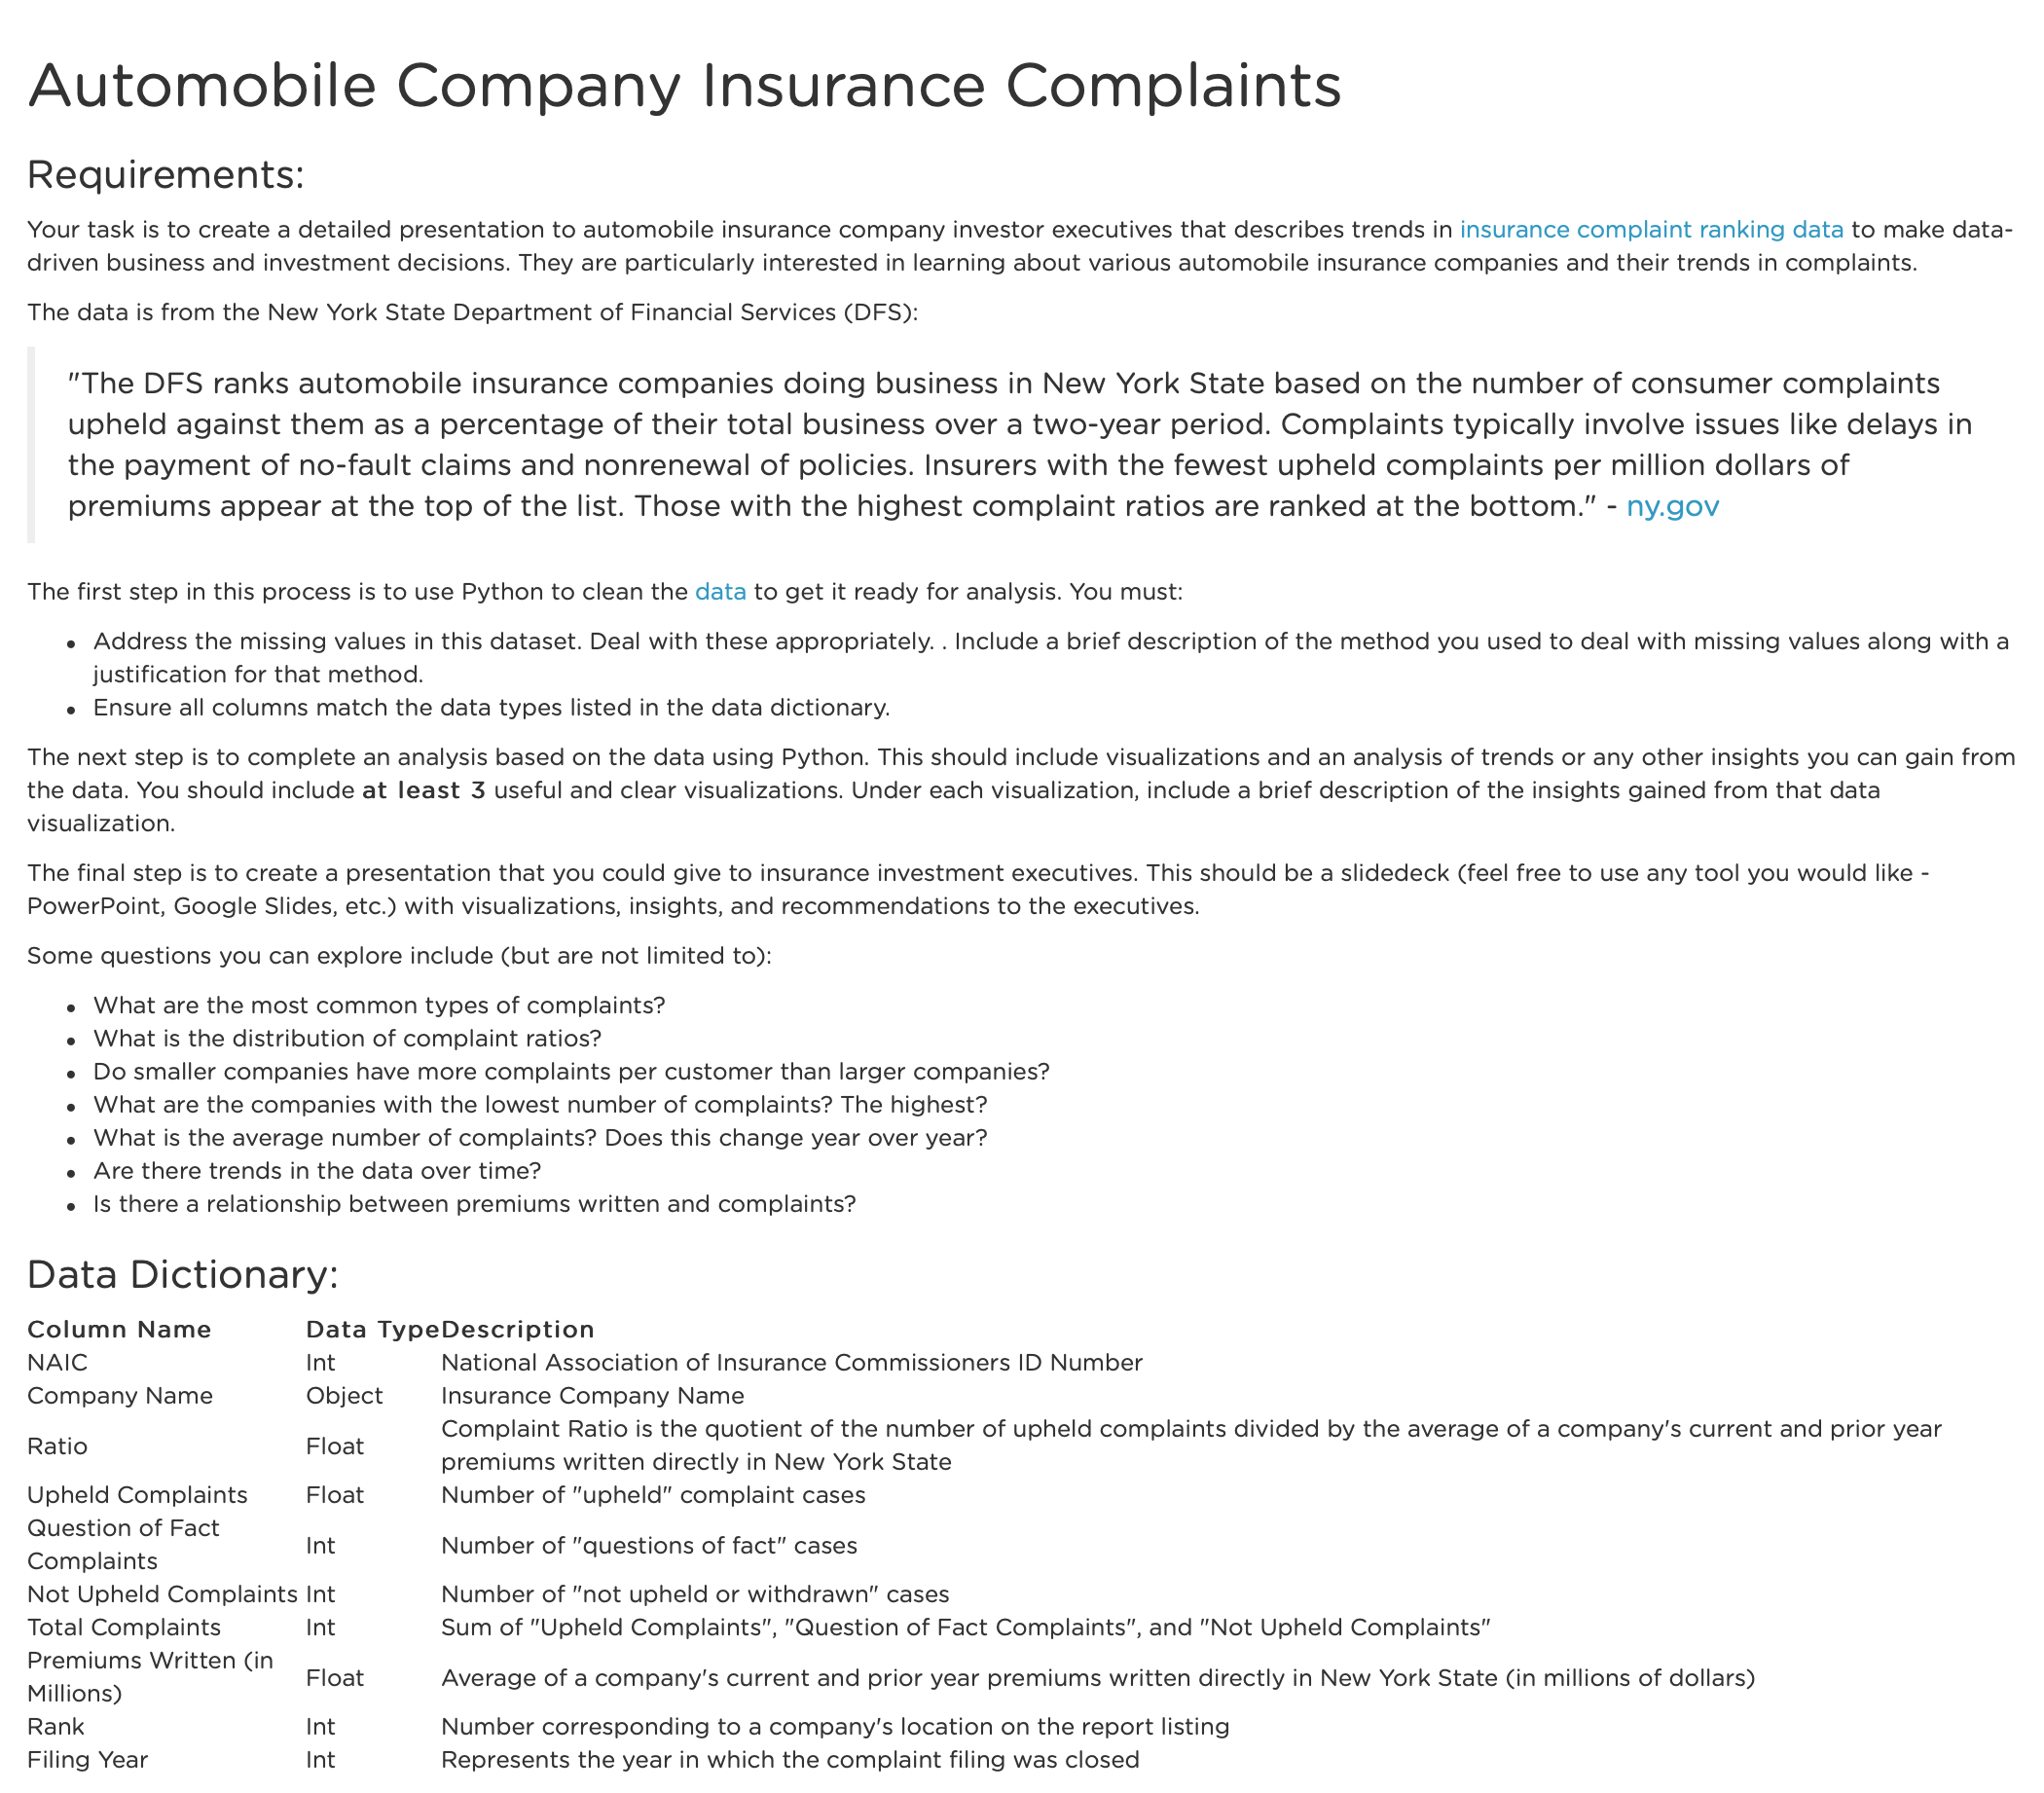

# 1 Importar librerías


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Montar Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3 Cargar la lista de datos



**El objetivo de esta sección será:**
Asegurar de que se han cargado los datos correctamente
Ver qué tipo de datos contiene
Revisar la validez de los datos

In [ ]:
filename = '/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/Assigment/auto-insurance-complaint-rankings.csv'
df = pd.read_csv(filename)
df.head(5)

,Unnamed: 0,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,0,32786,Progressive Specialty Insurance Company,0.0,0.0,17,29,46,204.173,1,2016
1,1,19976,Amica Mutual Insurance Company,0.0,0.0,9,8,17,84.769,2,2016
2,2,25453,Nationwide Insurance Company of America,0.0,0.0,9,4,13,65.335,3,2016
3,3,15024,Preferred Mutual Insurance Company,0.0,0.0,3,2,5,62.505,4,2016
4,4,10052,Chubb National Insurance Company,0.0,0.0,1,2,3,46.735,5,2016


In [ ]:
# Con este método observamos las últimas filas del dataset
df.tail()

,Unnamed: 0,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
1353,1353,22667,ACE American Insurance Company,12.5881,1.0,0,3,4,0.079,177,2009
1354,1354,23809,Granite State Insurance Company,14.2471,1.0,0,0,1,0.070,178,2009
1355,1355,10982,Long Island Insurance Company,25.8860,265.0,17,73,355,10.237,179,2009
1356,1356,16535,Zurich American Insurance Company,36.5845,1.0,0,1,2,0.027,180,2009
1357,1357,42889,Victoria Fire & Casualty Company,152.9403,1.0,1,1,3,0.007,181,2009


In [ ]:
#Copiamos nuestro df para no modificarlo  según requiera el análisis
df = df.copy()

In [ ]:
#Utilizamos el atributo shape para conocer la estructura del dataframe. Observamos que contiene 1358  filas y 10 columnas
df.shape

(1358, 11)

In [ ]:
#Contamos las columnas según tipo de variable
df.dtypes.value_counts()

int64      6
float64    3
object     2
dtype: int64

In [ ]:
#Verificar que las columnas coincidan con el diccionario de datos señalado en el enunciado
#La única variable que debemos convertir es la columna filling Year, además está mal escrita Por lo tanto , son 2 cambios que hay que generar
df.dtypes

Unnamed: 0                          int64
NAIC                                int64
Company Name                       object
Ratio                             float64
Upheld Complaints                 float64
Question of Fact Complaints         int64
Not Upheld Complaints               int64
Total Complaints                    int64
Premiums Written (in Millions)    float64
Rank                                int64
Filing Year                        object
dtype: object

In [ ]:
#Observamos que sólo debemos trabajar la columna "Denuncias confirmadas". Sólo contiene 5 filas nulas
df.isna().sum().sort_values(ascending = False)

Upheld Complaints                 5
Filing Year                       0
Rank                              0
Premiums Written (in Millions)    0
Total Complaints                  0
Not Upheld Complaints             0
Question of Fact Complaints       0
Ratio                             0
Company Name                      0
NAIC                              0
Unnamed: 0                        0
dtype: int64

In [ ]:
#Corrección nombre de columna a 'Filling Year' según diccionario y de 'Unnamed: 0'
df.rename(columns= {'Unnamed: 0': 'Index', 'Filing Year': 'Filling Year'}, inplace= True)
df.columns

Index(['Index', 'NAIC', 'Company Name', 'Ratio', 'Upheld Complaints',
       'Question of Fact Complaints', 'Not Upheld Complaints',
       'Total Complaints', 'Premiums Written (in Millions)', 'Rank',
       'Filling Year'],
      dtype='object')

In [ ]:
#Revisamos los campos de la columna filling year para corroborar de que podemos transformarla a Int sin problemas. Nos damos cuenta que hay un campo en letras. Debemos transformarla a número.
df['Filling Year'].unique()

array(['2016', 'Twenty-Sixteen', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009'], dtype=object)

In [ ]:
#Corrección Valor 
df['Filling Year']= df['Filling Year'].replace(['Twenty-Sixteen'],'2016')

In [ ]:
#Revisión cambio realizado
df['Filling Year'].unique()

array(['2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009'],
      dtype=object)

In [ ]:
df.set_index('Index',inplace = True)

In [ ]:
df.head()

,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filling Year
Index,,,,,,,,,,
0,32786,Progressive Specialty Insurance Company,0.0,0.0,17,29,46,204.173,1,2016
1,19976,Amica Mutual Insurance Company,0.0,0.0,9,8,17,84.769,2,2016
2,25453,Nationwide Insurance Company of America,0.0,0.0,9,4,13,65.335,3,2016
3,15024,Preferred Mutual Insurance Company,0.0,0.0,3,2,5,62.505,4,2016
4,10052,Chubb National Insurance Company,0.0,0.0,1,2,3,46.735,5,2016


In [ ]:
#df['arrival_date_week_number'] = np.array([int(item) if item != '#27' else int(item.replace('#', '')) for item in df['arrival_date_week_number']])
#df.dtypes

# 4 Limpieza de datos

In [ ]:
#Observamos que para los valores nulos , sólo se indica en la columna children: 4 ; country:  488, agent: 16340, company: 112593
df.apply(lambda x: sum(x.isnull())).sort_values(ascending=False)

Upheld Complaints                 5
Filling Year                      0
Rank                              0
Premiums Written (in Millions)    0
Total Complaints                  0
Not Upheld Complaints             0
Question of Fact Complaints       0
Ratio                             0
Company Name                      0
NAIC                              0
dtype: int64

In [ ]:
# Valores nulos de la columna "Upheld Complaints" la rellenamos con valores 0 dado que la columna Total Complaints = upheld complaints + question of facto complaints + not upheld complaint.
#Al rellena con números 0 la columna Total Complaints se mantiene con la suma exacta
df['Upheld Complaints'].fillna(df['Upheld Complaints'].mode()[0], inplace = True)

In [ ]:
#Revisamos que los cambios se han realizado correctamente
df.apply(lambda x: sum(x.isnull())).sort_values(ascending=False)

Filling Year                      0
Rank                              0
Premiums Written (in Millions)    0
Total Complaints                  0
Not Upheld Complaints             0
Question of Fact Complaints       0
Upheld Complaints                 0
Ratio                             0
Company Name                      0
NAIC                              0
dtype: int64

# 5 Análisis exploratorio de datos (EDA)

Analizar a las compañías de seguros de automóviles que describa las tendencias en los datos de clasificación de reclamos de seguros para tomar decisiones comerciales y de inversión basadas en datos. Están particularmente interesados en conocer varias compañías de seguros de automóviles y sus tendencias en las quejas.

* What are the most common types of complaints?
* What is the distribution of complaint ratios?
* Do smaller companies have more complaints per customer than larger companies?
* What are the companies with the lowest number of complaints? The highest?
* What is the average number of complaints? Does this change year over year?
* Are there trends in the data over time?
* Is there a relationship between premiums written and complaints?

In [ ]:
df.describe()

,NAIC,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,23936.145803,1.889557,3.104566,8.449190,14.896171,26.449926,64.379437,85.451399
std,9541.622447,38.291439,12.526851,33.353889,43.687174,84.382503,198.911112,49.305152
min,10022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000,1.000000
25%,16105.500000,0.000000,0.000000,0.000000,1.000000,2.000000,3.517500,43.000000
50%,23450.000000,0.016400,1.000000,1.000000,3.000000,6.000000,11.004000,85.000000
75%,29939.000000,0.106400,2.000000,5.000000,10.000000,17.000000,35.710000,128.000000
max,43974.000000,1364.877200,265.000000,698.000000,525.000000,1350.000000,2199.890000,181.000000


In [ ]:
df['Upheld Complaints'].sum()

4216.0

In [ ]:
df['Question of Fact Complaints'].sum()

11474

In [ ]:
df['Not Upheld Complaints'].sum()

20229

In [ ]:
#Este análisis lo podemos complementar con el método correlación y el gráfico scatter que se observan más abajo


empresa = df.groupby(['Company Name']).agg(complaints = ('Total Complaints', 'sum'), premiums_written = ('Premiums Written (in Millions)', 'sum'))
empresa.head()


,complaints,premiums_written
Company Name,,
21st Century Advantage Insurance Company,85,120.990
21st Century Centennial Insurance Company,63,98.910
21st Century Indemnity Insurance Company,72,88.876
21st Century Insurance Company,63,3.281
21st Century National Insurance Company,90,118.606


In [ ]:
empresa.sort_values(by = 'premiums_written', ascending=False)[0:20]

,complaints,premiums_written
Company Name,,
GEICO General Insurance Company,3898,13514.383
State Farm Mutual Automobile Insurance Company,2629,9557.517
Allstate Insurance Company,4949,7951.467
GEICO Indemnity Company,2057,6099.016
Government Employees Insurance Company,1797,4281.047
Allstate Property and Casualty Insurance Company,923,3887.041
Liberty Mutual Fire Insurance Company,1113,3405.324
New York Central Mutual Fire Insurance Company,725,1971.809
Allstate Fire and Casualty Insurance Company,343,1910.721


In [ ]:
empresa.sort_values(by = 'premiums_written', ascending=True)[0:20]

,complaints,premiums_written
Company Name,,
Clarendon National Insurance Company,12,0.007
Greater New York Mutual Insurance Company,1,0.013
OneBeacon Insurance Company,3,0.016
Zurich American Insurance Company,2,0.027
Infinity Casualty Insurance Company,1,0.032
Sentry Insurance A Mutual Company,1,0.067
Granite State Insurance Company,1,0.070
ACE American Insurance Company,4,0.079
National Interstate Insurance Company,1,0.142


Se observa un patrón detectable entre el tamaño de la compañia medida en primas emitidas y número de quejas. Es decir, a mayor número de primas emitidas mayor será el número de quejas.

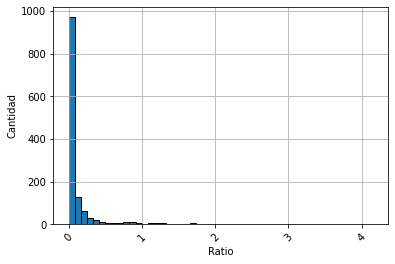

In [ ]:
#La columna tiene una distribución asimetrica hacia la derecha. Al observar el método "describe", podemos inferir que con el valor máx = 1364 esté moviendo la media a  1.8 Corroboramos ordenando la columna Ratio de mayor a menor
#observando los primeros 20 . Efectivamente tiende a mover el promedio.
#Asimismo, observamos que el 50% de los datos tiene como corte hasta el 0.016. y con cuartil 75% con 0.106 (Ver método "describe")
Ratio_filter = df.loc[:, 'Ratio'] <= 5
df.loc[Ratio_filter, 'Ratio'].hist(bins = 50, edgecolor='black')
plt.xticks(rotation = 45)
plt.xlabel('Ratio')
plt.ylabel('Cantidad')
plt.ticklabel_format(useOffset=False, style='plain')

In [ ]:
df['Ratio'].sort_values(ascending = False)[0:20]

Index
485     1364.8772
1176     280.4459
1357     152.9403
1175     128.0041
1174      74.5379
1356      36.5845
1173      33.7096
1172      31.5686
1355      25.8860
1171      25.7674
828       22.5286
484       19.1109
827       15.2014
997       14.9651
1354      14.2471
1353      12.5881
157       10.3314
315       10.3314
1170      10.3004
656       10.1550
Name: Ratio, dtype: float64

Text(0, 0.5, 'Upheld Complaints')

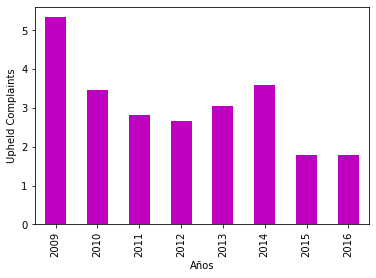

In [ ]:
#Si revisamos el promedio de quejas , observamos que vemos que tiende a la baja desde el 2009 al 2016
group = df.groupby(['Filling Year'])['Upheld Complaints'].agg('mean').plot.bar(color='m')
plt.xlabel('Años')
plt.ylabel('Upheld Complaints')


Text(0, 0.5, 'Question of Fact Complaints')

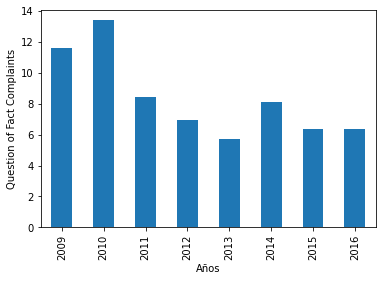

In [ ]:
#Lo mismo ocurre con aquellas quejas que están definidos como casos.
group = df.groupby(['Filling Year'])['Question of Fact Complaints'].agg('mean').plot.bar()
plt.xlabel('Años')
plt.ylabel('Question of Fact Complaints')

Text(0, 0.5, 'Not Upheld Complaints')

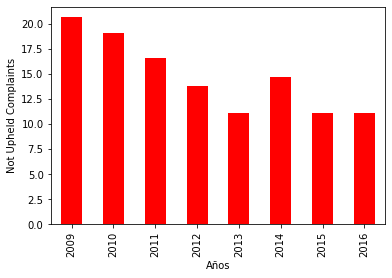

In [ ]:
#Debemos corroborarar con aquellas denuncias aún no confirmadas.
group = df.groupby(['Filling Year'])['Not Upheld Complaints'].agg('mean').plot.bar(color='red')
plt.xlabel('Años')
plt.ylabel('Not Upheld Complaints')

Text(0, 0.5, 'Total Complaints')

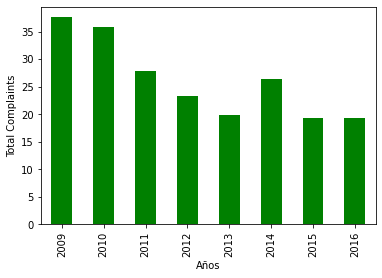

In [ ]:
group = df.groupby(['Filling Year'])['Total Complaints'].agg('mean').plot.bar(color='g')
plt.xlabel('Años')
plt.ylabel('Total Complaints')

In [ ]:
Max = df.groupby(['Company Name'])['Total Complaints'].agg('sum').sort_values(ascending=False)[0:20]
Max

Company Name
Allstate Insurance Company                          4949
GEICO General Insurance Company                     3898
Country-Wide Insurance Company                      3086
State Farm Mutual Automobile Insurance Company      2629
GEICO Indemnity Company                             2057
Government Employees Insurance Company              1797
Liberty Mutual Fire Insurance Company               1113
Allstate Property and Casualty Insurance Company     923
New York Central Mutual Fire Insurance Company       725
Progressive Casualty Insurance Company               682
State Farm Fire and Casualty Company                 409
Tri-State Consumer Insurance Company                 358
Long Island Insurance Company                        355
Allstate Fire and Casualty Insurance Company         343
Travelers Home and Marine Insurance Company          311
Progressive Direct Insurance Company                 310
Progressive Advanced Insurance Company               295
Esurance Insurance

In [ ]:
Min= df.groupby(['Company Name'])['Total Complaints'].agg('sum').sort_values(ascending=True)[0:20]
Min

Company Name
Amica Property and Casualty Insurance Company    0
Pacific Employers Insurance Company              0
Pacific Indemnity Company                        0
Harleysville Insurance Company                   0
Harleysville Worcester Insurance Company         0
Integon Preferred Insurance Company              0
Cim Insurance Corporation                        1
Greater New York Mutual Insurance Company        1
Associated Indemnity Corporation                 1
Granite State Insurance Company                  1
Sentry Insurance A Mutual Company                1
Metropolitan General Insurance Company           1
National Interstate Insurance Company            1
Privilege Underwriters Reciprocal Exchange       1
Landmark Insurance Company                       1
Infinity Casualty Insurance Company              1
Illinois National Insurance Co.                  2
Safeco National Insurance Company                2
Harleysville Preferred Insurance Company         2
National Surety Co

Text(0, 0.5, 'Total Complaints')

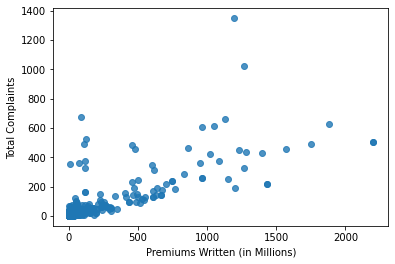

In [ ]:
#Al observar la relación entre primas emitidas y total quejas. Vemos que si existe una relación positiva entre las 2.
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df['Premiums Written (in Millions)'] , y=df['Total Complaints'], alpha= 0.8)
ax.set_xlabel('Premiums Written (in Millions)')
ax.set_ylabel('Total Complaints')

In [ ]:
#Corroboramos con el método corr para observar de manera más específica la correlación alcanzando un valor de 0.78. Se concluye que existe una relación positiva fuerte entre estas dos variables
df.corr()

,NAIC,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank
NAIC,1.000000,0.000387,-0.058876,-0.008123,-0.026010,-0.025417,0.039323,-0.033283
Ratio,0.000387,1.000000,0.015716,-0.010671,-0.011389,-0.007781,-0.015575,0.085535
Upheld Complaints,-0.058876,0.015716,1.000000,0.647562,0.688946,0.761102,0.491588,0.198424
Question of Fact Complaints,-0.008123,-0.010671,0.647562,1.000000,0.908369,0.961691,0.768053,0.075720
Not Upheld Complaints,-0.026010,-0.011389,0.688946,0.908369,1.000000,0.979055,0.792102,0.125264
Total Complaints,-0.025417,-0.007781,0.761102,0.961691,0.979055,1.000000,0.786659,0.124239
Premiums Written (in Millions),0.039323,-0.015575,0.491588,0.768053,0.792102,0.786659,1.000000,0.042596
Rank,-0.033283,0.085535,0.198424,0.075720,0.125264,0.124239,0.042596,1.000000


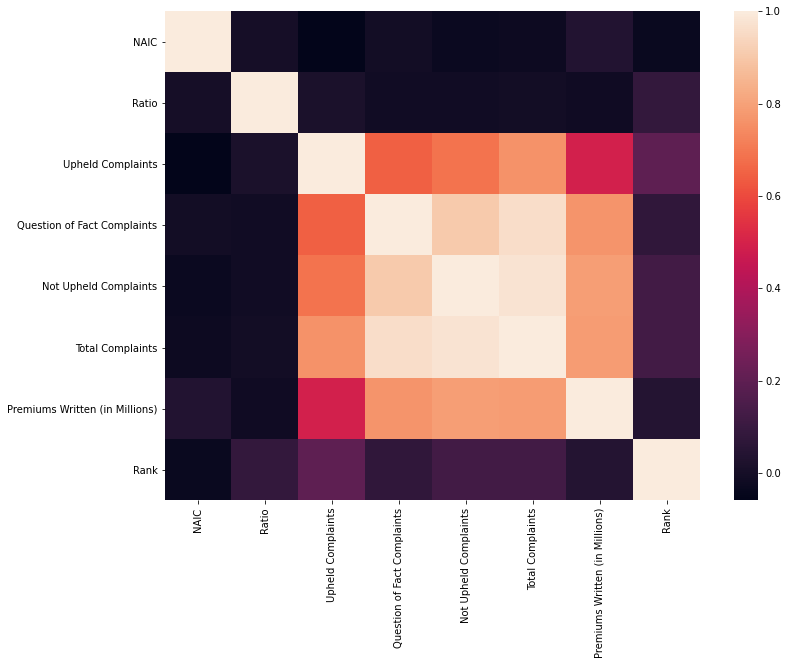

In [ ]:
plt.figure(figsize = (12, 9))
sns.heatmap(df.corr())
plt.show()